In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams.update({'font.size': 16})

In [3]:
path_new = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated")
res = []
for entry in path_new.iterdir():
    print(entry)
    path_betas = entry.joinpath('TMmodel/betas.npy')
    if path_betas.is_file():
        betas = np.load(path_betas)
        print(betas.shape)

/export/usuarios_ml4ds/lbartolome/experiments_federated/centralized_model_50_20221025
(50, 65926)
/export/usuarios_ml4ds/lbartolome/experiments_federated/centralized_model_20221022
(10, 65926)
/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_1_20221023
(10, 53053)
/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_2_20221023
(10, 51812)
/export/usuarios_ml4ds/lbartolome/experiments_federated/centralized_model_25_20221025
(25, 65926)
/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_5_20221023
(10, 51251)
/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_3_20221023
(10, 56010)
/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_4_20221023
(10, 46157)


In [4]:
path_new = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated")
res = []
for entry in path_new.iterdir():
    # check if it is a file
    if "centralized" in entry.as_posix():
        model_id = 0
    else:
        model_id = int(entry.as_posix().split("node_")[1].split("_")[0])
    path_cohrs = entry.joinpath('TMmodel/topic_coherence.npy')
    if path_cohrs.is_file():
        cohrs = np.load(path_cohrs)
    else:
        cohrs = []
    path_desc = entry.joinpath('TMmodel/tpc_descriptions.txt')
    if path_desc.is_file():
        with path_desc.open('r', encoding='utf8') as fin:
            topics = [el.strip() for el in fin.readlines()]
    else:
        topics = []
    path_alphas = entry.joinpath('TMmodel/alphas.npy')
    if path_alphas.is_file():
        alphas = np.load(path_alphas)
    else:
        alphas = []
    res.append([model_id, cohrs, topics, alphas])

df = pd.DataFrame(res)
df.columns = ["id", "cohrs", "topics", "alphas"]
df

,id,cohrs,topics,alphas
0,0,[],[],[]
1,0,[],[],[]
2,0,"[0.7465482067275782, 0.7357006733445852, 0.161...","[film, philosophy, literary, aesthetic, charac...","[0.11403965438585839, 0.10487708309351067, 0.1..."
3,1,"[0.7252653308650905, 0.7509436912263135, 0.318...","[notation, calculus, clause, rewrite, verb, pa...","[0.10623854496530644, 0.10532112575415824, 0.1..."
4,2,"[0.6947086815561072, 0.74657128695276, 0.68268...","[political, law, right, democracy, conflict, e...","[0.10882447538693371, 0.104504554863989, 0.103..."
5,0,[],[],[]
6,0,"[0.7950342576905022, 0.6693135626485827, 0.771...","[violation, enforcement, crime, duty, voting, ...","[0.04703833344930664, 0.04516255968710147, 0.0..."
7,5,"[0.27432689022162837, 0.7576529844944123, 0.26...","[modification, fine, inmate, judgement, redres...","[0.10793634612797814, 0.10447233996241827, 0.1..."
8,3,"[0.19696038097565213, 0.5822359655274469, 0.64...","[execution, restorative, riot, consolidation, ...","[0.10727765941286499, 0.1066796837178229, 0.10..."
9,4,"[0.37534602160360897, 0.5146439129618607, 0.45...","[marxist, socialism, freudian, intersubjectivi...","[0.11571239602784736, 0.10542280445010561, 0.1..."


In [58]:
model = 3
topics = df[df.id == model].topics.tolist()[0]
alphas = df[df.id == model].alphas.tolist()[0]
cohrs = df[df.id == model].cohrs.tolist()[0]
topics_alphas_cohrs = [[el[0],el[1],el[2]] for el in zip(topics,alphas,cohrs)]
df_el = pd.DataFrame(topics_alphas_cohrs)
df_el.columns = ["topics", "alphas", "cohrs"]
df_el = df_el.sort_values(by=['alphas'],ascending=False)
df_el.topics.tolist()

['execution, restorative, riot, consolidation, penal, criminology, assembly, outbreak, constituency, scottish, veteran, genocide, bureaucracy, populist, aggression',
 'confucian, harmonious, cultivation, connotation, humanistic, round, outlook, realistic, carrier, harmony, humanism, modernization, socialism, chinese, talent',
 'law, legal, party, state, right, constitutional, military, international, rule, government, democracy, democratic, regime, judicial, security',
 'learner, literacy, engineering, competency, competence, classroom, pedagogical, teaching, instruction, pedagogy, programme, lecturer, undergraduate, educator, curriculum',
 'migrant, household, immigrant, migration, neighborhood, resident, housing, rural, income, youth, adolescent, labour, parental, elderly, employment',
 'feminist, writer, religion, character, jewish, novel, christian, story, religious, feminism, history, sexuality, poetry, queer, film',
 'ranking, handbook, email, tip, inventory, consultant, rating, 

In [40]:
path_fed = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/centralized_model_20221022")
vocab_w2id = {}
vocab_id2w = {}
vocab_fed = []
with path_fed.joinpath("TMmodel/vocab.txt").open('r', encoding='utf8') as fin:
    for i, line in enumerate(fin):
        wd = line.strip()
        vocab_w2id[wd] = int(i)
        vocab_id2w[str(i)] = wd
        vocab_fed.append(wd)
print(len(vocab_w2id))
betas = np.load(path_fed.joinpath('TMmodel/betas.npy'))
print(betas.shape)

65926
(10, 65926)


In [66]:
path_fed = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/centralized_model_25_20221025")
betas25 = np.load(path_fed.joinpath('TMmodel/betas.npy'))
print(betas25.shape)

path_fed = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/centralized_model_50_20221025")
betas50 = np.load(path_fed.joinpath('TMmodel/betas.npy'))
print(betas50.shape)

(25, 65926)
(50, 65926)


In [127]:
path_desc = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/centralized_model_25_20221025").joinpath('TMmodel/tpc_descriptions.txt')
with path_desc.open('r', encoding='utf8') as fin:
    topics = [el.strip() for el in fin.readlines()]
for topic in range(len(topics)):
    print("TOPIC " + str(topic) + ": "+ topics[topic] + "\n")

TOPIC 0: violation, enforcement, crime, duty, voting, judicial, vote, jurisdiction, legislative, judge, trial, obligation, procedural, litigation, punishment

TOPIC 1: image, color, segmentation, brain, segment, reconstruction, synthetic, registration, wavelet, fusion, scene, diagnosis, resolution, label, recognition

TOPIC 2: portfolio, default, bond, conditional, equity, dividend, trading, announcement, valuation, return, hedge, trader, investor, risky, asymmetry

TOPIC 3: famous, passage, greek, letter, manuscript, forget, tragedy, sacrifice, painting, die, infectious, catholic, edition, remember, beauty

TOPIC 4: retirement, occupational, demographic, job, fertility, elderly, pension, mortality, housing, occupation, employer, hospital, cohort, resident, birth

TOPIC 5: theorem, bound, formula, player, infinite, generalized, converge, polynomial, deterministic, exact, bind, exponential, quadratic, theoretic, algebraic

TOPIC 6: talent, cultivate, cultivation, specialty, countermeasu

In [41]:
path_model = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_1_20221023")
vocab_w2id_node = {}
vocab_id2w_node = {}
vocab_fed_node = []
with path_model.joinpath("TMmodel/vocab.txt").open('r', encoding='utf8') as fin:
    for i, line in enumerate(fin):
        wd = line.strip()
        vocab_w2id_node[wd] = int(i)
        vocab_id2w_node[str(i)] = wd
        vocab_fed_node.append(wd)
print(len(vocab_w2id_node))
betas_node = np.load(path_model.joinpath('TMmodel/betas.npy'))
print(betas_node.shape)

53053
(10, 53053)


In [50]:
print(vocab_fed_node[0:20])
print(vocab_fed[0:20])

['0001', '001', '002', '009', '01', '02', '03', '0400', '05', '05월', '0d', '0f', '0n', '0s', '0v', '10', '100', '1002', '1007', '100k']
['0001', '001', '002', '009', '01', '02', '03', '0400', '05', '05월', '0d', '0f', '0n', '0pt', '0s', '0v', '10', '100', '1002', '1007']


In [54]:
w_t_distrib = np.zeros((betas.shape[0], betas.shape[1]), dtype=np.float64)
for i in tqdm(np.arange(betas.shape[0])):
    for idx in vocab_id2w_node:
        if int(idx)%10000==0:
            print(idx + "/" + str(len(vocab_id2w_node)))
        for j in np.arange(betas.shape[1]):
            if vocab_id2w_node[idx] == vocab_id2w[str(j)]:
                w_t_distrib[i, j] = betas_node[i][int(idx)]
                break

  0%|                                                                                                              | 0/10 [00:00<?, ?it/s]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


 10%|█████████▊                                                                                        | 1/10 [28:12<4:13:49, 1692.19s/it]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


 20%|███████████████████▌                                                                              | 2/10 [56:42<3:47:03, 1702.95s/it]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


 30%|████████████████████████████▊                                                                   | 3/10 [1:25:44<3:20:46, 1720.90s/it]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


 40%|██████████████████████████████████████▍                                                         | 4/10 [1:54:33<2:52:23, 1723.94s/it]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


 50%|████████████████████████████████████████████████                                                | 5/10 [2:22:44<2:22:40, 1712.19s/it]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


 60%|█████████████████████████████████████████████████████████▌                                      | 6/10 [2:52:53<1:56:19, 1744.83s/it]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


 70%|███████████████████████████████████████████████████████████████████▏                            | 7/10 [3:20:26<1:25:44, 1714.88s/it]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


 80%|██████████████████████████████████████████████████████████████████████████████▍                   | 8/10 [3:48:03<56:32, 1696.44s/it]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


 90%|████████████████████████████████████████████████████████████████████████████████████████▏         | 9/10 [4:15:13<27:55, 1675.88s/it]

0/53053
10000/53053
20000/53053
30000/53053
40000/53053
50000/53053


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [4:42:43<00:00, 1696.39s/it]


In [120]:
path_model1 = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_1_20221023")
np.save(path_model1.joinpath('TMmodel/betas_matched.npy'), w_t_distrib)

In [55]:
path_model2 = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_2_20221023")
vocab_w2id_node2 = {}
vocab_id2w_node2 = {}
with path_model2.joinpath("TMmodel/vocab.txt").open('r', encoding='utf8') as fin:
    for i, line in enumerate(fin):
        wd = line.strip()
        vocab_w2id_node2[wd] = int(i)
        vocab_id2w_node2[str(i)] = wd
print(len(vocab_w2id_node2))
betas_node2 = np.load(path_model2.joinpath('TMmodel/betas.npy'))
print(betas_node2.shape)

51812
(10, 51812)


In [56]:
w_t_distrib2 = np.zeros((betas.shape[0], betas.shape[1]), dtype=np.float64)
for i in tqdm(np.arange(betas.shape[0])):
    for idx in vocab_id2w_node2:
        if int(idx)%10000==0:
            print(idx + "/" + str(len(vocab_id2w_node2)))
        for j in np.arange(betas.shape[1]):
            if vocab_id2w_node2[idx] == vocab_id2w[str(j)]:
                w_t_distrib2[i, j] = betas_node2[i][int(idx)]
                break

  0%|                                                                                                              | 0/10 [00:00<?, ?it/s]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


 10%|█████████▊                                                                                        | 1/10 [26:51<4:01:39, 1611.09s/it]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


 20%|███████████████████▌                                                                              | 2/10 [53:36<3:34:20, 1607.58s/it]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


 30%|████████████████████████████▊                                                                   | 3/10 [1:20:10<3:06:49, 1601.35s/it]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


 40%|██████████████████████████████████████▍                                                         | 4/10 [1:47:05<2:40:41, 1606.95s/it]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


 50%|████████████████████████████████████████████████                                                | 5/10 [2:13:49<2:13:49, 1605.82s/it]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


 60%|█████████████████████████████████████████████████████████▌                                      | 6/10 [2:40:45<1:47:16, 1609.16s/it]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


 70%|███████████████████████████████████████████████████████████████████▏                            | 7/10 [3:09:08<1:22:00, 1640.08s/it]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


 80%|██████████████████████████████████████████████████████████████████████████████▍                   | 8/10 [3:36:25<54:37, 1638.82s/it]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


 90%|████████████████████████████████████████████████████████████████████████████████████████▏         | 9/10 [4:05:21<27:49, 1669.50s/it]

0/51812
10000/51812
20000/51812
30000/51812
40000/51812
50000/51812


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [4:33:51<00:00, 1643.11s/it]


In [121]:
path_model2 = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_2_20221023")
np.save(path_model2.joinpath('TMmodel/betas_matched.npy'), w_t_distrib2)

In [72]:
print(betas.shape)
print(w_t_distrib.shape)
print(w_t_distrib2.shape)
print(np.sum(w_t_distrib,axis=1))

(10, 65926)
(10, 65926)
(10, 65926)
[0.99998316 0.99997851 0.99998657 0.99998751 0.99997914 0.99997754
 0.99997838 0.99997932 0.99997865 0.99997934]


In [141]:
path_model3 = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_3_20221023")
w_t_distrib3 =  np.load(path_model3.joinpath('TMmodel/betas_matched.npy'))
print(w_t_distrib3.shape)

(10, 65926)


In [112]:
path_model4 = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_4_20221023")
w_t_distrib4 =  np.load(path_model4.joinpath('TMmodel/betas_matched.npy'))
print(w_t_distrib4.shape)

(10, 65926)


In [145]:
path_model5 = Path("/export/usuarios_ml4ds/lbartolome/experiments_federated/model_node_5_20221023")
w_t_distrib5 =  np.load(path_model5.joinpath('TMmodel/betas_matched.npy'))
print(w_t_distrib5.shape)

(10, 65926)


In [146]:
score_betas_node1 = np.sum(np.max(np.sqrt(betas).dot(np.sqrt(w_t_distrib.T)), axis=0))
print(score_betas_node1)

score_betas_node2 = np.sum(np.max(np.sqrt(betas).dot(np.sqrt(w_t_distrib2.T)), axis=0))
print(score_betas_node2)

score_betas_node3 = np.sum(np.max(np.sqrt(betas).dot(np.sqrt(w_t_distrib3.T)), axis=0))
print(score_betas_node3)
score_betas_node4 = np.sum(np.max(np.sqrt(betas).dot(np.sqrt(w_t_distrib4.T)), axis=0))
print(score_betas_node4)
score_betas_node5 = np.sum(np.max(np.sqrt(betas).dot(np.sqrt(w_t_distrib5.T)), axis=0))
print(score_betas_node4)

#####

score_betas25_node1 = np.sum(np.max(np.sqrt(betas25).dot(np.sqrt(w_t_distrib.T)), axis=0))
print(score_betas25_node1)

score_betas25_node2 = np.sum(np.max(np.sqrt(betas25).dot(np.sqrt(w_t_distrib2.T)), axis=0))
print(score_betas25_node2)

score_betas25_node3 = np.sum(np.max(np.sqrt(betas25).dot(np.sqrt(w_t_distrib3.T)), axis=0))
print(score_betas25_node3)
score_betas25_node4 = np.sum(np.max(np.sqrt(betas25).dot(np.sqrt(w_t_distrib4.T)), axis=0))
print(score_betas25_node4)
score_betas25_node5 = np.sum(np.max(np.sqrt(betas25).dot(np.sqrt(w_t_distrib5.T)), axis=0))
print(score_betas25_node5)

score_betas50_node1 = np.sum(np.max(np.sqrt(betas50).dot(np.sqrt(w_t_distrib.T)), axis=0))
print(score_betas50_node1)

score_betas50_node2 = np.sum(np.max(np.sqrt(betas50).dot(np.sqrt(w_t_distrib2.T)), axis=0))
print(score_betas50_node2)

score_betas50_node3 = np.sum(np.max(np.sqrt(betas50).dot(np.sqrt(w_t_distrib3.T)), axis=0))
print(score_betas50_node3)
score_betas50_node4 = np.sum(np.max(np.sqrt(betas50).dot(np.sqrt(w_t_distrib4.T)), axis=0))
print(score_betas50_node4)
score_betas50_node5 = np.sum(np.max(np.sqrt(betas50).dot(np.sqrt(w_t_distrib5.T)), axis=0))
print(score_betas50_node5)

8.139099909766426
8.094392232533076
8.513202686761367
7.545049088274658
7.545049088274658
5.0420409738217336
5.0585195098850955
5.520204908774028
4.673144043278356
5.018029654686424
2.553249759714019
2.492021834089632
2.497879026409809
2.4597029705003055
2.430455319438624


In [147]:
score_node1_node1 = np.sum(np.max(np.sqrt(w_t_distrib).dot(np.sqrt(w_t_distrib.T)), axis=0))
print(score_node1_node1)
score_node1_node2 = np.sum(np.max(np.sqrt(w_t_distrib).dot(np.sqrt(w_t_distrib2.T)), axis=0))
print(score_node1_node2)
score_node1_node3 = np.sum(np.max(np.sqrt(w_t_distrib).dot(np.sqrt(w_t_distrib3.T)), axis=0))
print(score_node1_node3)
score_node1_node4 = np.sum(np.max(np.sqrt(w_t_distrib).dot(np.sqrt(w_t_distrib4.T)), axis=0))
print(score_node1_node4)
score_node1_node5 = np.sum(np.max(np.sqrt(w_t_distrib).dot(np.sqrt(w_t_distrib5.T)), axis=0))
print(score_node1_node5)

score_node2_node2 = np.sum(np.max(np.sqrt(w_t_distrib2).dot(np.sqrt(w_t_distrib2.T)), axis=0))
print(score_node2_node2)
score_node2_node3 = np.sum(np.max(np.sqrt(w_t_distrib2).dot(np.sqrt(w_t_distrib3.T)), axis=0))
print(score_node2_node3)
score_node2_node4 = np.sum(np.max(np.sqrt(w_t_distrib2).dot(np.sqrt(w_t_distrib4.T)), axis=0))
print(score_node2_node4)
score_node2_node5 = np.sum(np.max(np.sqrt(w_t_distrib2).dot(np.sqrt(w_t_distrib5.T)), axis=0))
print(score_node2_node5)

score_node3_node3 = np.sum(np.max(np.sqrt(w_t_distrib3).dot(np.sqrt(w_t_distrib3.T)), axis=0))
print(score_node3_node3)
score_node3_node4 = np.sum(np.max(np.sqrt(w_t_distrib3).dot(np.sqrt(w_t_distrib4.T)), axis=0))
print(score_node3_node4)
score_node3_node5 = np.sum(np.max(np.sqrt(w_t_distrib3).dot(np.sqrt(w_t_distrib5.T)), axis=0))
print(score_node3_node5)

score_node4_node4 = np.sum(np.max(np.sqrt(w_t_distrib4).dot(np.sqrt(w_t_distrib4.T)), axis=0))
print(score_node4_node4)
score_node4_node5 = np.sum(np.max(np.sqrt(w_t_distrib4).dot(np.sqrt(w_t_distrib5.T)), axis=0))
print(score_node4_node5)

score_node5_node5 = np.sum(np.max(np.sqrt(w_t_distrib5).dot(np.sqrt(w_t_distrib5.T)), axis=0))
print(score_node5_node5)

9.999808127980206
7.990993398743203
7.865236468515959
7.316418275619755
7.614494957203701
9.999801085930102
8.47788713502344
7.633512432259278
8.483750095346307
9.999626911309434
8.54943664531036
8.95706755140094
9.999775443837962
8.106802171860126
9.999596497411972


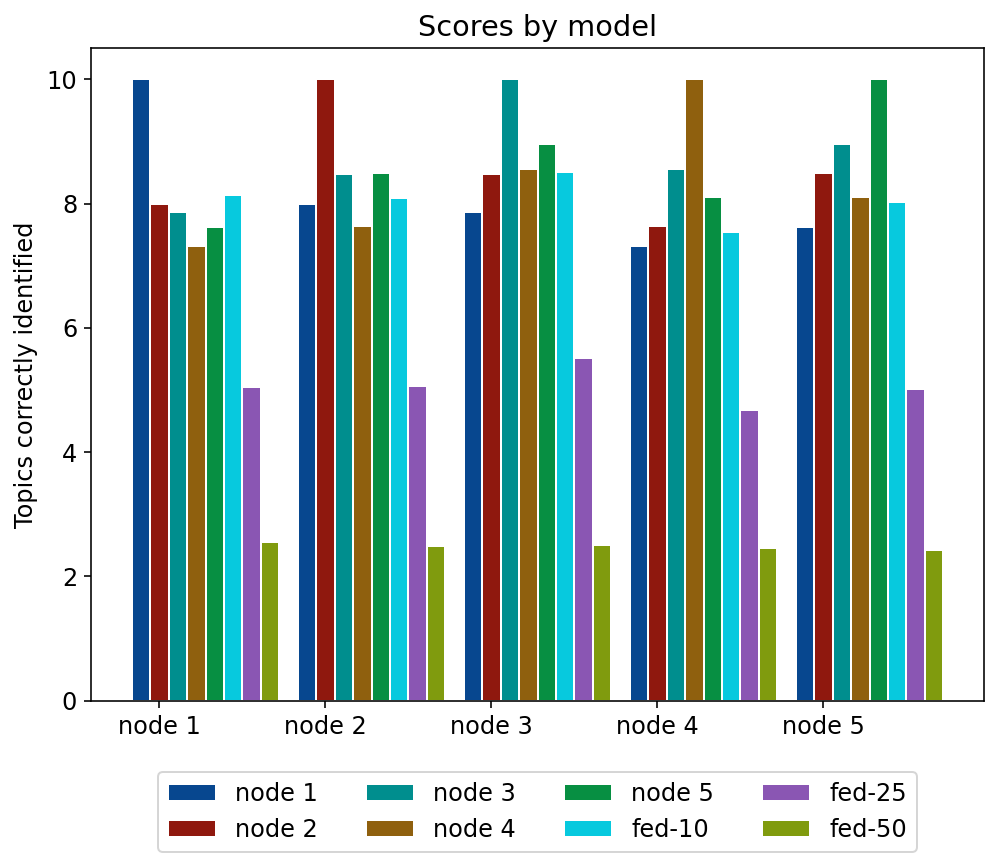

In [176]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 12})
# set width of bars
barWidth = 1/9
 
# set heights of bars
bars1 = [score_node1_node1, score_node1_node2, score_node1_node3, score_node1_node4, score_node1_node5]
bars2 = [score_node1_node2, score_node2_node2, score_node2_node3, score_node2_node4, score_node2_node5]
bars3 = [score_node1_node3, score_node2_node3, score_node3_node3, score_node3_node4, score_node3_node5]
bars4 = [score_node1_node4, score_node2_node4, score_node3_node4, score_node4_node4, score_node4_node5]
bars5 = [score_node1_node5, score_node2_node5, score_node3_node5, score_node4_node5, score_node5_node5]
bars6 = [score_betas_node1, score_betas_node2, score_betas_node3, score_betas_node4, score_betas_node5]
bars7 = [score_betas25_node1, score_betas25_node2, score_betas25_node3, score_betas25_node4, score_betas25_node5]
bars8 = [score_betas50_node1, score_betas50_node2, score_betas50_node3, score_betas50_node4, score_betas50_node5]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4] 
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

# Make the plot
plt.bar(r1, bars1, color = "#07478F", width=barWidth, edgecolor='white', label='node 1')
plt.bar(r2, bars2, color = "#8F180E", width=barWidth, edgecolor='white', label='node 2')
plt.bar(r3, bars3, color = "#008E8E", width=barWidth, edgecolor='white', label='node 3')
plt.bar(r4, bars4, color = "#8F600E", width=barWidth, edgecolor='white', label='node 4')
plt.bar(r5, bars5, color = "#078F42", width=barWidth, edgecolor='white', label='node 5')
plt.bar(r6, bars6, color = "#07C9DE", width=barWidth, edgecolor='white', label='fed-10')
plt.bar(r7, bars7, color = "#8A56B3", width=barWidth, edgecolor='white', label='fed-25')
plt.bar(r8, bars8, color = "#809B0E", width=barWidth, edgecolor='white', label='fed-50')

# Add xticks on the middle of the group bars
#plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['node 1', 'node 2', 'node 3', 'node 4', 'node 5'])
plt.ylabel('Topics correctly identified')
plt.title('Scores by model')
# Create legend & Show graphic
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=4)
plt.show()

In [129]:
print("Centralized with 10")
print("MAX", np.max(betas))
print("MIN", np.min(betas))
print("\n")

print("Centralized with 25")
print("MAX", np.max(betas25))
print("MIN", np.min(betas25))
print(np.sum(betas25,axis=1))
print("\n")

print("Centralized with 50")
print("MAX", np.max(betas50))
print("MIN", np.min(betas50))
print("\n")

print("Non-collab node 1")
print("MAX", np.max(betas_node))
print("MIN", np.min(betas_node))
print("\n")

print("Non-collab node 2")
print("MAX", np.max(betas_node2))
print("MIN", np.min(betas_node2))
print("\n")

Centralized with 10
MAX 0.018776508
MIN 1.3742105e-11


Centralized with 25
MAX 0.94527423
MIN 1e-12
[0.9999999  1.0000002  1.0000002  0.9999994  1.0000006  0.99999917
 1.000001   1.000001   0.99999976 0.9999998  1.0000005  1.0000005
 1.0000005  1.0000005  0.9999991  1.         0.9999996  0.9999988
 0.9999999  0.9999992  0.99999976 1.         1.0000002  0.9999999
 1.0000005 ]


Centralized with 50
MAX 0.998561
MIN 1e-12


Non-collab node 1
MAX 0.0012827613
MIN 1.5065755e-08


Non-collab node 2
MAX 0.0005266793
MIN 2.1777254e-07




In [140]:
print("Centralized with 25")
print("MAX OF ALL:", np.max(betas25))
print("MIN OF ALL:", np.min(betas25))
print("MAX", np.max(betas25, axis=1))
print("MIN", np.min(betas25, axis=1))
#print(np.sum(betas25,axis=1))
print("\n")
print(len(np.where(betas25==np.max(betas25))))

Centralized with 25
MAX OF ALL: 0.94527423
MIN OF ALL: 1e-12
MAX [0.11233511 0.63170755 0.333726   0.15356015 0.20543034 0.48666164
 0.94527423 0.25959566 0.14693294 0.38122484 0.21011394 0.22448508
 0.29888996 0.1606129  0.02851129 0.2639109  0.01871204 0.01318957
 0.06670669 0.88753647 0.17051527 0.03216697 0.02658669 0.00978786
 0.02502421]
MIN [1.0000001e-12 1.0000008e-12 1.0000000e-12 1.0000000e-12 1.0000000e-12
 1.0000000e-12 1.0000000e-12 1.0000000e-12 1.0000001e-12 1.0000001e-12
 1.0000008e-12 1.0000000e-12 1.0000004e-12 1.0000000e-12 1.0000000e-12
 1.0000000e-12 1.0000000e-12 1.0000000e-12 1.0000001e-12 1.0000000e-12
 1.0000001e-12 1.0000019e-12 1.0000006e-12 1.0000000e-12 1.0000000e-12]


2


In [184]:
betas25.dtype

dtype('float32')